<a href="https://colab.research.google.com/github/diegobarrera/kaggle-ML/blob/master/HR_ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sector Recursos Humanos

 Estamos buscando una forma de automatizar la selección de candidatos para puestos de trabajo.
 Nos gustaría poder analizar los currículums y las cartas de presentación para identificar a los candidatos más adecuados para cada puesto.

 ¿Podría la IA ayudarnos a realizar esta tarea?


1. Escogemos una o varias tareas a resolver
  Normalmente los curriculums y las cartas de presentacion vienen en formato pdf o word. Una primera tarea es poder convertir esto a algo que sea entendible por una maquina.
  Segunda tarea es saber que se espera para esa vacante y poder ver segun lo descrito en el curriculum si tiene similitud, por lo tanto hay que buscar una forma de poder medir la misma.

1. Escogemos una librería de software
 Inicial para poder extraer el contenido del curriculum podemos usar una libreria de OCR. Luego este texto seria usado en un modelo que permita medir la similitud entre 2 textos.

1. Creamos nuestro dataset etiquetado (o no…..)
1. Escogemos n modelos
 Seleccion de modelos previamente entrenados.
 * Tesseract para la extraccion de texto
 * Libreria de similitud de medición HuggingFace: https://huggingface.co/tasks/sentence-similarity
1. Entrenamos
1. Poner en marcha (como quiere nuestro cliente que ejecutemos la solución)

Hay otras alternativas, como podrian ser multimodales que permitan hacer OCR y LLM.
* https://huggingface.co/spaces/stepfun-ai/GOT_official_online_demo
* https://huggingface.co/HuggingFaceM4/Idefics3-8B-Llama3




In [27]:
!apt-get install poppler-utils # install poppler-utils, which includes pdfinfo
!pip install pdf2image

!sudo apt install tesseract-ocr
!pip install pytesseract



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.

In [17]:
import pdf2image
import pytesseract
from PIL import Image

def pdf_to_img(pdf_file):
    return pdf2image.convert_from_path(pdf_file)

In [18]:
def download_pdf(url):
  !wget {url}
  return url.split('/')[-1]

In [22]:
# https://es.overleaf.com/latex/templates/swe-resume-template/bznbzdprjfyy.pdf

curriculum_url = download_pdf('https://es.overleaf.com/latex/templates/swe-resume-template/bznbzdprjfyy.pdf')

--2024-10-12 15:01:21--  https://es.overleaf.com/latex/templates/swe-resume-template/bznbzdprjfyy.pdf
Resolving es.overleaf.com (es.overleaf.com)... 34.120.52.64
Connecting to es.overleaf.com (es.overleaf.com)|34.120.52.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: ‘bznbzdprjfyy.pdf’

bznbzdprjfyy.pdf        [ <=>                ] 112.25K  --.-KB/s    in 0.01s   

2024-10-12 15:01:22 (8.36 MB/s) - ‘bznbzdprjfyy.pdf’ saved [114940]



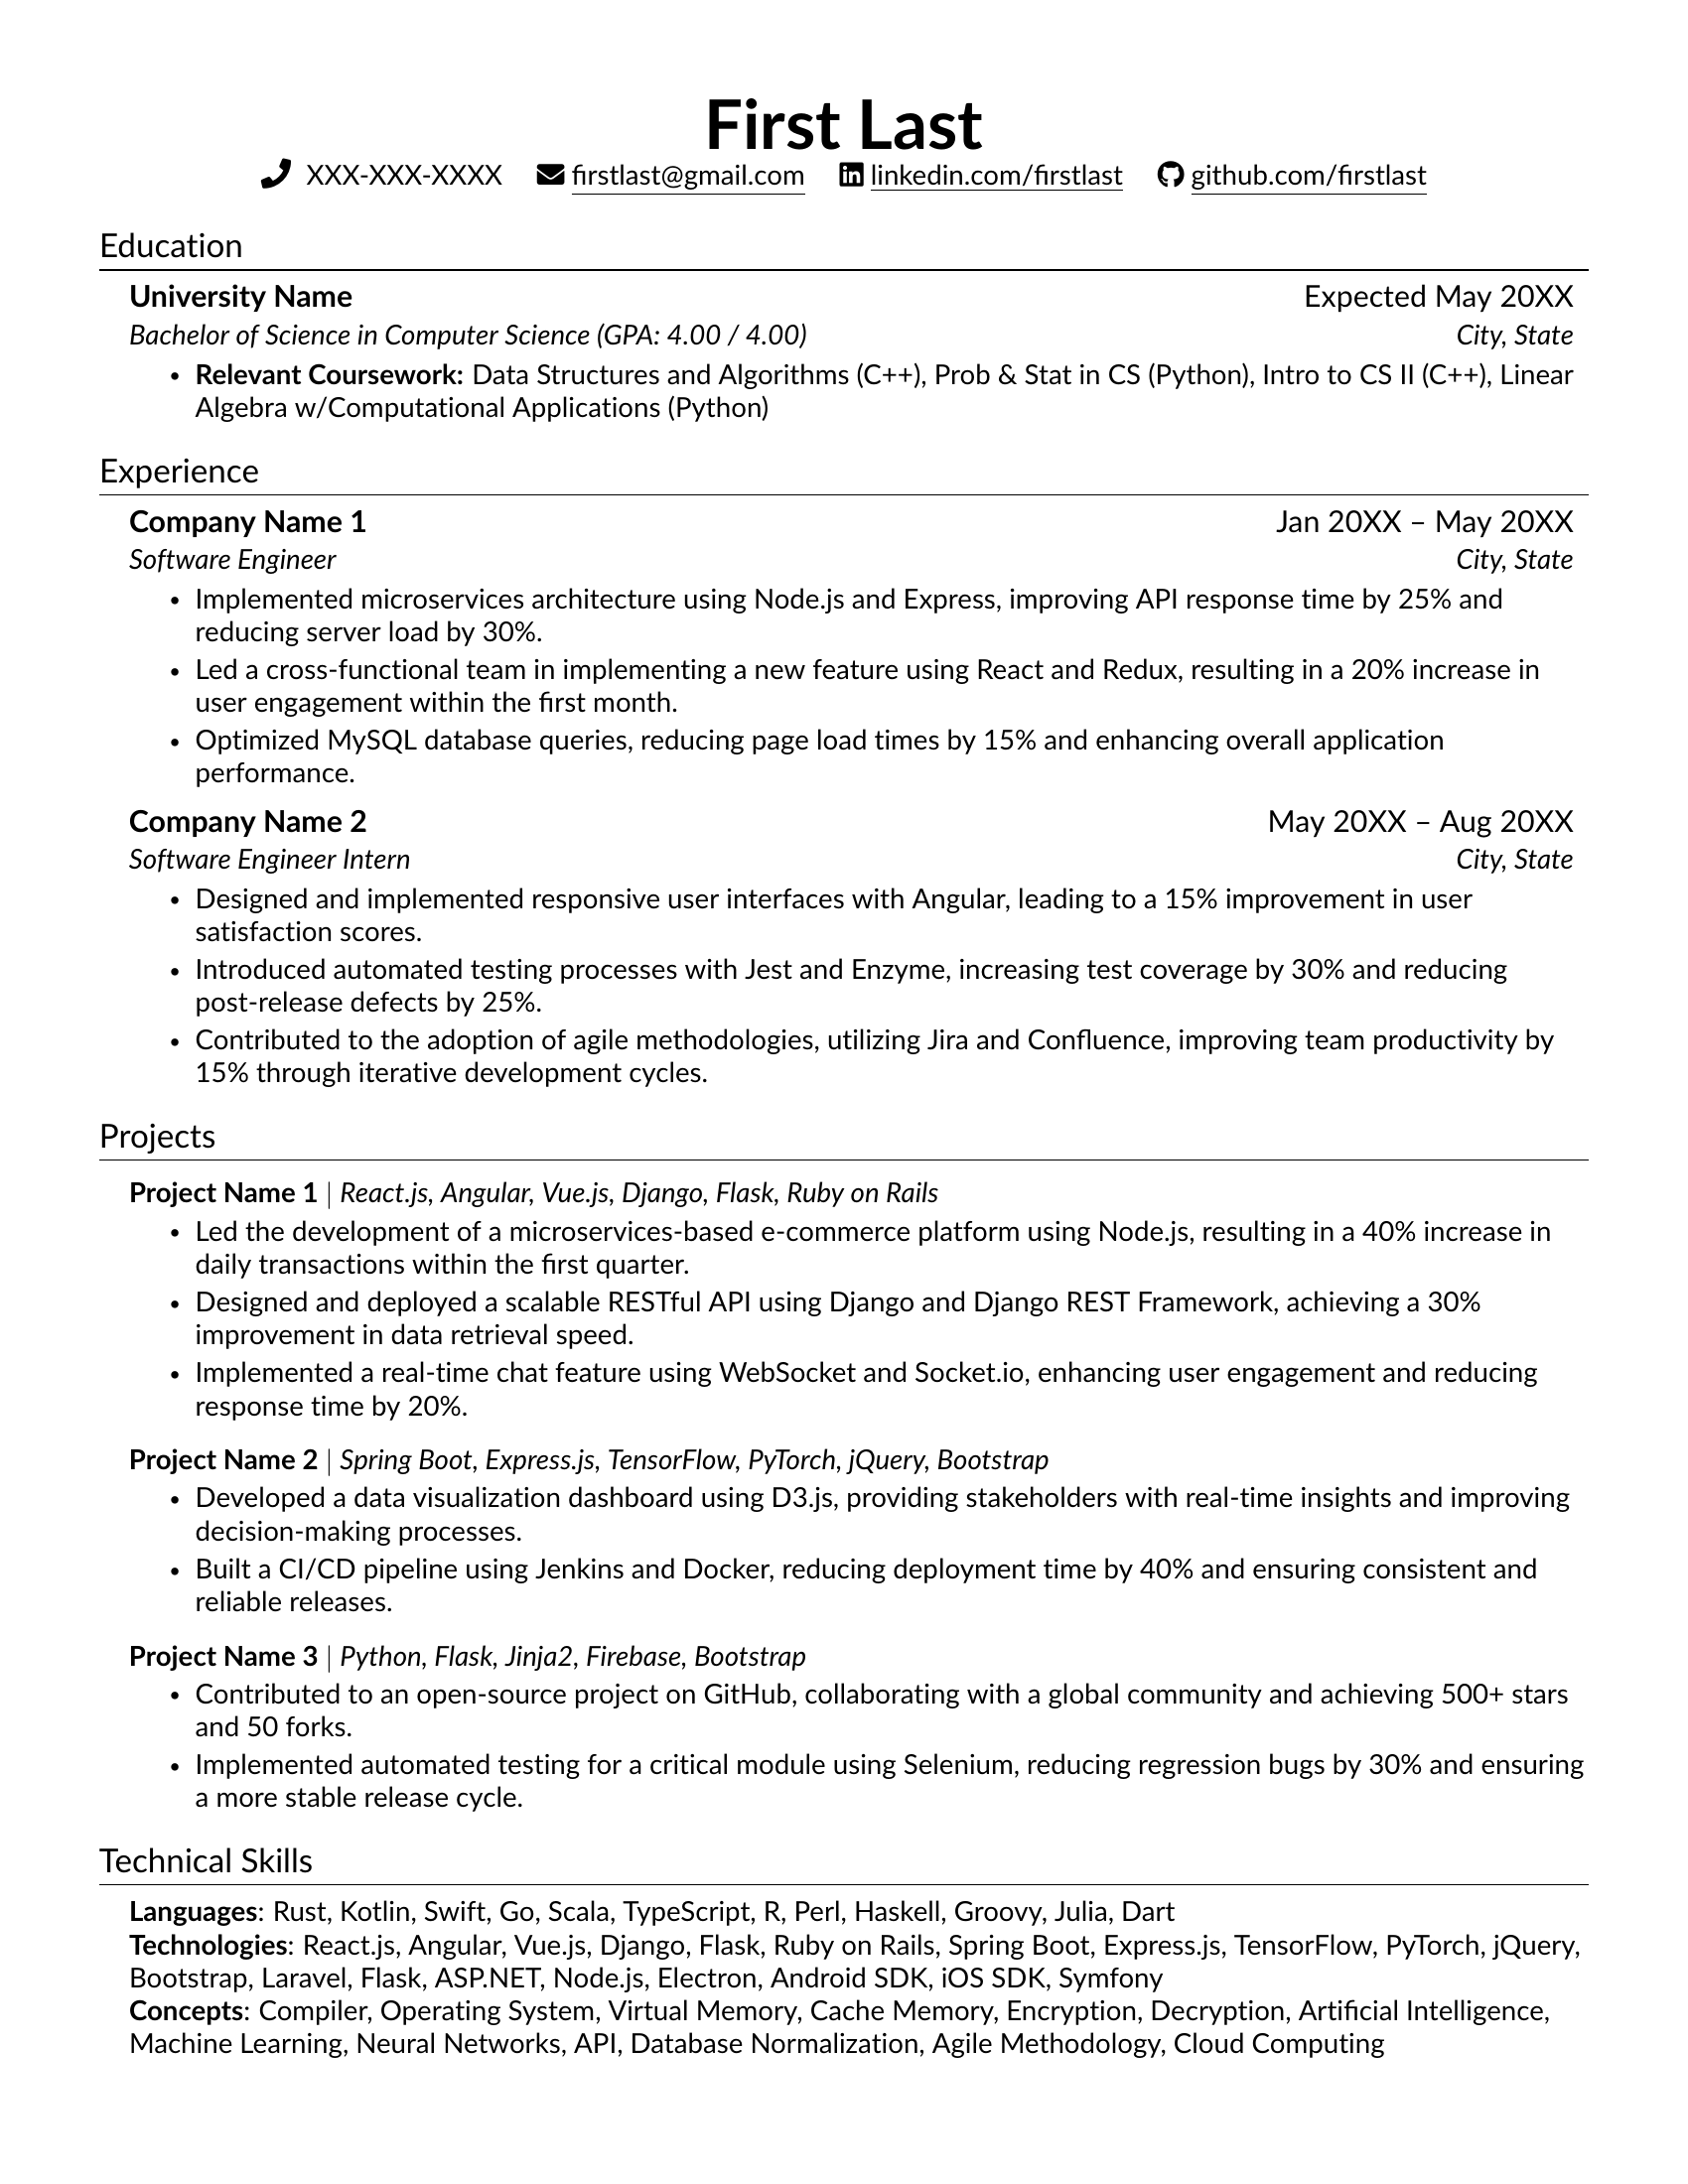

In [25]:
curriculum_image = pdf_to_img('/content/' + curriculum_url)
curriculum_image[0]

In [28]:
extractedInformation = pytesseract.image_to_string(curriculum_image[0]) # Access the first image in the list
print(extractedInformation)

First Last

oJ XXX-XXX-XXXX SG firstlast@gmail.com HB linkedin.com/firstlast © github.com/firstlast

 

Education
University Name Expected May 20XX
Bachelor of Science in Computer Science (GPA: 4.00 / 4.00) City, State

« Relevant Coursework: Data Structures and Algorithms (C++), Prob & Stat in CS (Python), Intro to CS II (C++), Linear
Algebra w/Computational Applications (Python)

 

Experience
Company Name 1 Jan 20XX - May 20XX
Software Engineer City, State

¢ Implemented microservices architecture using Node.js and Express, improving API response time by 25% and
reducing server load by 30%.

« Led a cross-functional team in implementing a new feature using React and Redux, resulting in a 20% increase in
user engagement within the first month.

« Optimized MySQL database queries, reducing page load times by 15% and enhancing overall application

performance.
Company Name 2 May 20XX - Aug 20XX
Software Engineer Intern City, State

¢ Designed and implemented responsive user interfaces 

## Check similarity between Extracted data and Position description

In [29]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.2/255.2 kB 3.6 MB/s eta 0:00:00


In [32]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [33]:
job_description_1 = "As a mountain photographer, you'll capture the breathtaking beauty of the mountains through stunning photography. Plan and execute expeditions to capture high-quality images of landscapes, wildlife, and climbers. Edit and process your photos to enhance their visual impact. Network with outdoor enthusiasts, travel companies, and media outlets to market and sell your work."
job_description_2 = "Join our dynamic team as a Junior Software Engineer specializing in Ruby on Rails. You'll develop and maintain web applications, collaborate with designers and other developers, write clean and efficient code, learn new technologies, and contribute to the team's growth and success."
job_description_3 = "As a Software Engineer (Python), you'll design, develop, and maintain Python-based applications. You'll work on various projects, collaborate with cross-functional teams, stay updated on the latest Python technologies, and contribute to the team's technical excellence and innovation."

In [36]:
sentences = [job_description_1, extractedInformation]

#Compute embedding for both lists
embedding_1= model.encode(sentences[0], convert_to_tensor=True)
embedding_2 = model.encode(sentences[1], convert_to_tensor=True)
util.pytorch_cos_sim(embedding_1, embedding_2)

tensor([[0.0060]])

In [37]:
sentences = [job_description_2, extractedInformation]

#Compute embedding for both lists
embedding_1= model.encode(sentences[0], convert_to_tensor=True)
embedding_2 = model.encode(sentences[1], convert_to_tensor=True)
util.pytorch_cos_sim(embedding_1, embedding_2)

tensor([[0.2105]])

In [38]:
sentences = [job_description_3, extractedInformation]

#Compute embedding for both lists
embedding_1= model.encode(sentences[0], convert_to_tensor=True)
embedding_2 = model.encode(sentences[1], convert_to_tensor=True)
util.pytorch_cos_sim(embedding_1, embedding_2)

tensor([[0.1548]])